# ​Intro: ​Machine Learning-Based Analysis of CVSS Base Attack Vectors - Peter
Sharedscreen - Kalead

## University of Berkeley
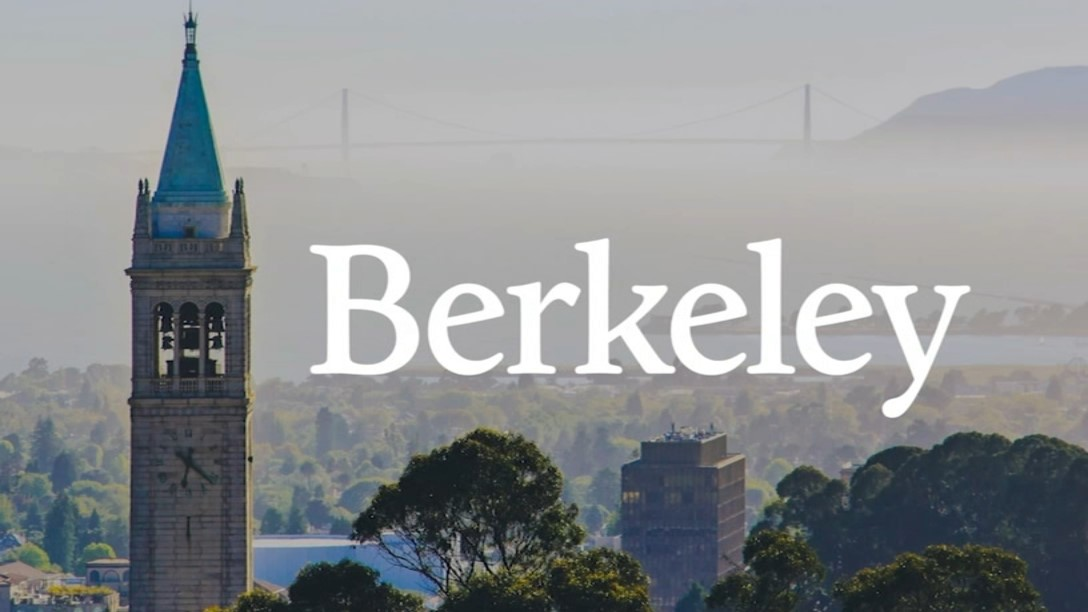

# Table of Contents (Left Panel)

---
## Cyber 207 Group 1 Members
* Kalead Bassma
  * kbassma@ischool.berkeley.edu
  * https://www.linkedin.com/in/kalead-bassma-23a7a7144/
* Peter Trinh
  * trinhp@ischool.berkeley.edu
  * https://www.linkedin.com/in/trinhva/
* Scott Macphee
  * scott.macphee@ischool.berkeley.edu
  * https://www.linkedin.com/in/scott-macphee-394a25b1/
* NP - Narayanan Potti
  * pattu@ischool.berkeley.edu
  * https://www.linkedin.com/in/npotti/
---
## Acknowledgments
* We would like to express our heartfelt gratitude to Dr. Napoleon Paxton (ncpaxton@berkeley.edu) of UC Berkeley’s I School for his invaluable guidance and unwavering support throughout the course. His expertise and mentorship were instrumental in shaping and refining this machine learning project.
  * https://www.ischool.berkeley.edu/people/napoleon-paxton
  * https://www.linkedin.com/in/napoleon-paxton/
---
* Version: 1
---
# References
1. Feed_forward_neural_net_example.ipynb https://colab.research.google.com/drive/1GV-zGw4dqysP2RUwhrb3ahFv4bCUjJjv?usp=sharing#scrollTo=ByLrg5K3n4Oi


---


# Github
* https://github.berkeley.edu/scott-macphee/Cyber207-Group1

---
# <font color='red'> Pre-requisite - Scott </font>
* !pip install
* import libraries
* drive.mount('/content/drive')

In [ ]:
#!pip install seaborn
import seaborn as sns

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
#import dataset from google drive
#from google.colab import drive
#drive.mount('/content/drive')

# <font color='red'> Step 1: Import Dataset, Clean Up and Pre-Process Data - Scott</font>
* Upload Dataset Manually or Connect via Google Drive

In [ ]:
#importing dataset
#Kal edit: switched to CSV for easier read. Issues with excel file
#Current dataset we are using has been edited and parsed beforehand to look at attack vector strings
#Manual Upload
dataset = pd.read_csv('dataset_v4.csv', on_bad_lines='skip', engine='python')

#Google Drive
#dataset = pd.read_csv('/content/drive/MyDrive/dataset_v4.csv', on_bad_lines='skip', engine='python')

#Drop incomplete features
dataset.drop(["Port","Protocol","Tracking Method","FQDN","SSL","Bugtraq ID"], axis=1, inplace=True)

## 1.1 Partial view of dataset from top

In [ ]:
dataset.head()

,IP,DNS,NetBIOS,OS,IP Status,Title,Severity,First Detected,Last Detected,CVE ID,Vendor Reference,CVSS,CVSS Base Score,CVSS Attack Vector Origin,CVSS Attack Complexity,CVSS Attack Authentication,Confidentiality,Integrity Impact,Availability Impact
0,192.168.254.154,cmo33614.city.santaclara.local,CMO33614,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",Mozilla Firefox and Firefox ESR Use-After-Free...,5,10/10/2024 1:33,10/14/2024 7:54,CVE-2024-9680,mfsa2024-51,8.3,10.0,N,L,N,C,C,C)
1,192.168.254.154,cmo33614.city.santaclara.local,CMO33614,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",Adobe Acrobat and Reader Arbitrary Code Execut...,5,3/28/2024 4:39,4/1/2024 4:53,"CVE-2023-44336, CVE-2023-44337, CVE-2023-44338...",APSB23-54,4.0,5.4,A,M,M,N,C,P)
2,192.168.254.154,cmo33614.city.santaclara.local,CMO33614,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",Adobe Acrobat and Reader Security Feature Bypa...,5,3/28/2024 4:39,4/1/2024 4:53,"CVE-2023-29299, CVE-2023-29303, CVE-2023-29320...",APSB23-30,4.5,5.4,A,M,M,N,C,P)
3,192.168.254.154,cmo33614.city.santaclara.local,CMO33614,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",Adobe Security Update for Adobe Acrobat and Ad...,5,3/28/2024 4:39,4/1/2024 4:53,"CVE-2021-44701, CVE-2021-44702, CVE-2021-44703...",APSB22-01,7.7,9.3,N,M,N,C,C,C)
4,192.168.254.154,cmo33614.city.santaclara.local,CMO33614,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",Microsoft Office Security Update for July 2024,5,7/10/2024 5:22,9/26/2024 17:31,"CVE-2024-38021, CVE-2024-38020",Office Click-2-Run and Office 365 Release Note...,7.4,9.4,N,L,N,N,C,C)


## 1.2 Partial view of dataset from bottom

In [ ]:
dataset.tail()

,IP,DNS,NetBIOS,OS,IP Status,Title,Severity,First Detected,Last Detected,CVE ID,Vendor Reference,CVSS,CVSS Base Score,CVSS Attack Vector Origin,CVSS Attack Complexity,CVSS Attack Authentication,Confidentiality,Integrity Impact,Availability Impact
610249,10.0.0.10,fd33034.city.santaclara.local,FD33034,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",Zoom Client Information Disclosure Vulnerabili...,2,8/9/2023 15:43,10/22/2023 11:14,CVE-2023-34114,ZSB-23016,3.0,4.0,N,L,S,P,N,N)
610250,10.0.0.10,fd33034.city.santaclara.local,FD33034,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",McAfee Endpoint Security Multiple Vulnerabilit...,2,2/1/2022 9:05,2/7/2022 7:34,"CVE-2021-31842, CVE-2021-31843",SB10367,3.4,4.6,L,L,N,P,P,P)
610251,10.0.0.10,fd33034.city.santaclara.local,FD33034,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",Windows Explorer Autoplay Not Disabled for Def...,2,8/31/2021 17:53,10/11/2024 9:45,NaN,NaN,3.6,5.0,N,L,N,N,P,N)
610252,10.0.0.10,fd33034.city.santaclara.local,FD33034,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",Microsoft Windows Explorer AutoPlay Not Disabled,2,8/31/2021 17:53,10/11/2024 9:45,NaN,NaN,3.6,5.0,N,L,N,N,P,N)
610253,10.0.0.10,fd33034.city.santaclara.local,FD33034,Windows 10 Enterprise 64 bit Edition Version 22H2,"host scanned, found vuln",Enabled Cached Logon Credential,2,8/31/2021 17:53,10/11/2024 9:45,NaN,NaN,3.6,5.0,N,L,N,P,N,N)


## 1.3 Dimention of the dataset

In [ ]:
dataset.shape

(610254, 19)

## 1.4 Basic statistics summary. Only works for numeric columns

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,610254.0,3.863673,0.693644,1.0,4.0,4.0,4.0,5.0
CVSS,610254.0,5.087606,1.462071,0.0,4.0,5.0,5.9,9.5
CVSS Base Score,610254.0,6.518413,1.733818,0.0,5.4,6.8,7.5,10.0


# <font color='red'> Step 2: Assign our x-y axes. For now, we select all columns to feed into our K means model in order to analyze relationships - Peter</font>
* Find Independent Features (X)

In [ ]:
# Select specific columns from the dataset for clustering
selected_columns = [
    "CVSS Attack Vector Origin",
    "CVSS Attack Complexity",
    "CVSS Attack Authentication",
    "Confidentiality",
    "Integrity Impact",
    "Availability Impact",
    "CVSS Base Score"
]
revised_dataset=dataset[selected_columns]
# Extract X as a NumPy array
X = dataset[selected_columns].values
#X_all is everything
X_all=dataset.values
print(X)


[['N' 'L' 'N' ... 'C' 'C)' 10.0]
 ['A' 'M' 'M' ... 'C' 'P)' 5.4]
 ['A' 'M' 'M' ... 'C' 'P)' 5.4]
 ...
 ['N' 'L' 'N' ... 'P' 'N)' 5.0]
 ['N' 'L' 'N' ... 'P' 'N)' 5.0]
 ['N' 'L' 'N' ... 'N' 'N)' 5.0]]


## Categorical encoding
As we have 6 columns as categorical terms we go for encoding we need to convert to numerical
1. CVSS Attack Vector Origin
2. CVSS Attack Complexity
3. CVSS Attack Authentication
4. Confidentiality Impact
5. Integrity Impact
6. Availability Impact

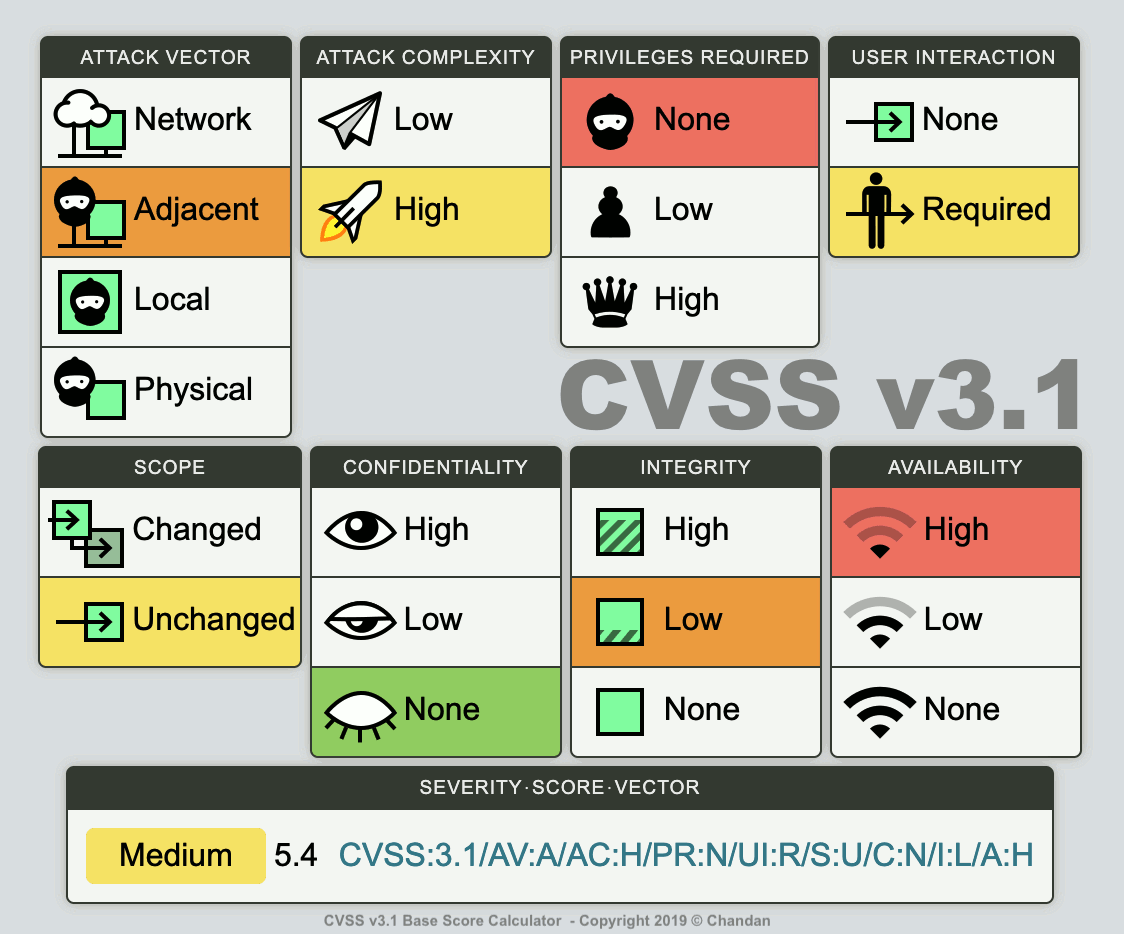

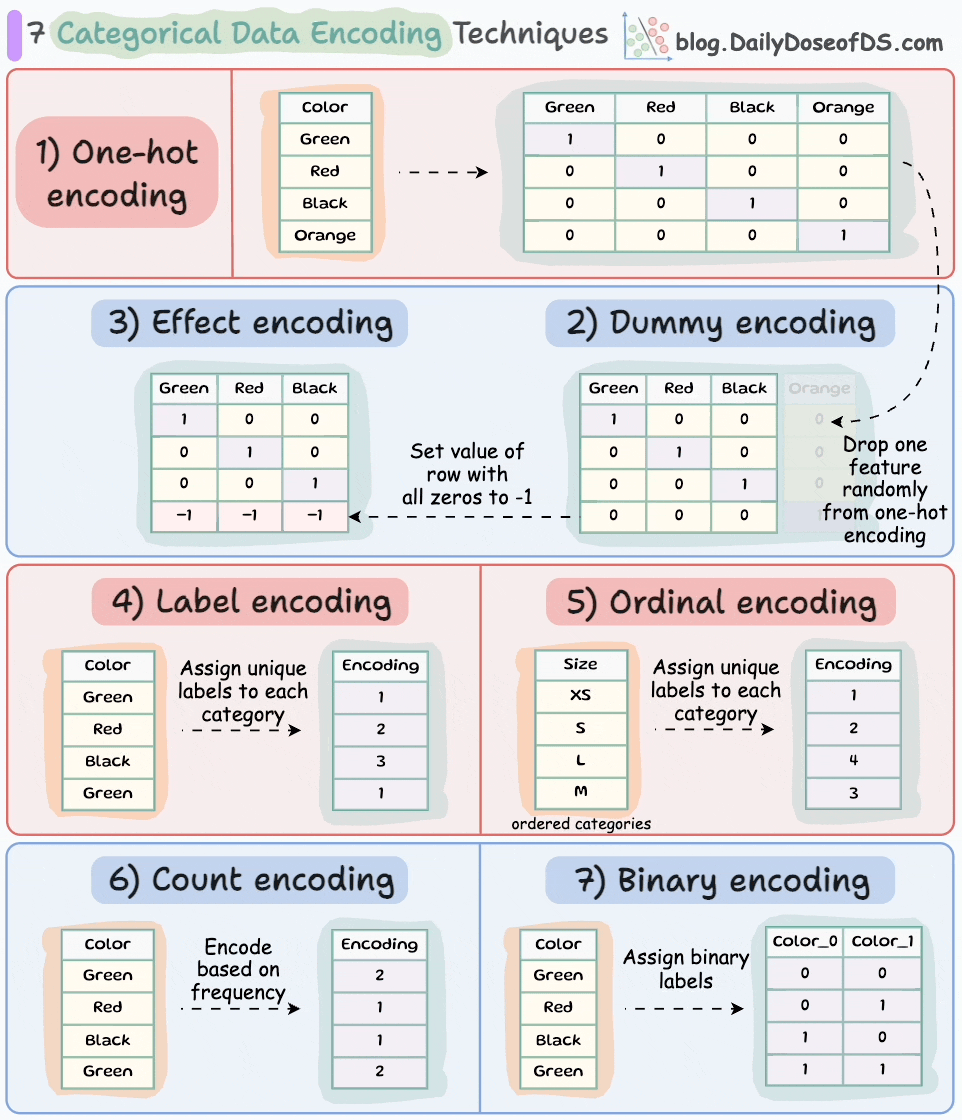

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding all columns in X
for col_index in range(X.shape[1]):  # Iterate through all columns of X
    X[:, col_index] = le.fit_transform(X[:, col_index])

for col_index in range(X_all.shape[1]):  # Iterate through all columns of X
    X_all[:, col_index] = le.fit_transform(X_all[:, col_index])

# <font color='red'>Step 3: Implement Unsupervised Learning - Kalead</font>




## K Means Models
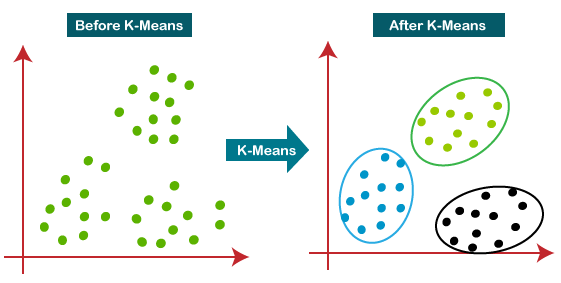
*   Run Kmeans on the total dataset
*   Label Clusters via K means algorithm
*   Generate adjusted dataset with labels
*   Identify overlapping clusters
*   Run K means on truncated dataset with overlapping clusters to find common and related features

Note: address "bias" issues

We run K means to generate an arbitrary amount of clusters. This will output a labelled dataset (output.csv) and graph








Kal Note: may want to use the below stuff instead

PCA Transformation

In [ ]:
#test code adjusted for non-revised dataset

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Use data from 'dataset' for PCA and KMeans
# Assuming 'target_columns' from the previous section still holds the relevant features
train_data = X_all

# Handle missing values (NaN) by removing or imputing:
#train_data.dropna(inplace=True)  # Removes rows with NaN
# OR
# train_data.fillna(train_data.mean(), inplace=True)  # Imputes with mean

#create and fit pca model to training data
pca_model=PCA(n_components=2)
pca_model.fit(train_data)

train_data_2d=pca_model.transform(train_data)


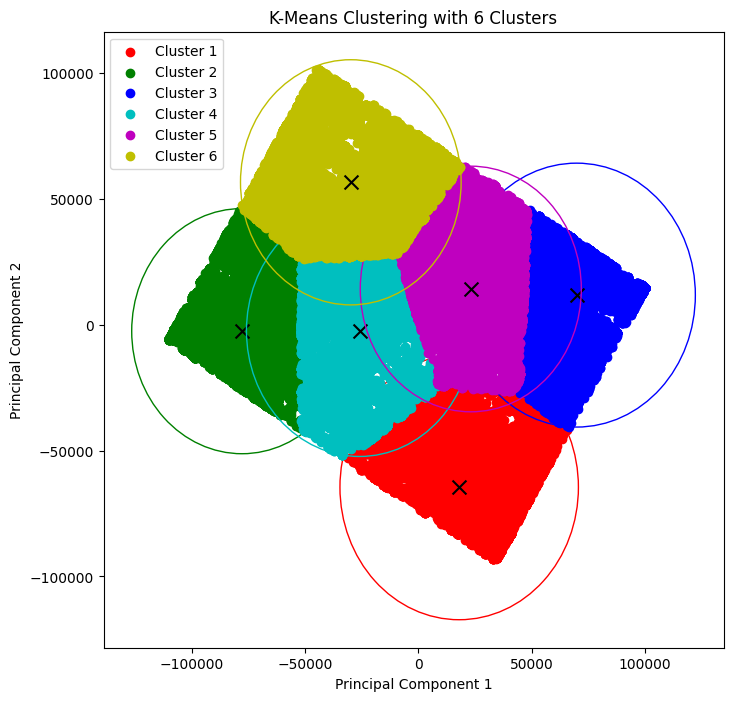

In [ ]:

#create k means
kmeans_model=KMeans(n_clusters=6)
kmeans_model.fit(train_data_2d)
#get cluster labels and centroids
cluster_labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

# Visualize clusters, centroids, and circles
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Colors for clusters

for cluster in range(6):
    # Get data points for the current cluster
    cluster_data = train_data_2d[cluster_labels == cluster]

    # Plot data points for the current cluster
    plt.scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        color=colors[cluster],
        label=f'Cluster {cluster + 1}',
    )

    # Plot centroid for the current cluster
    plt.scatter(
        centroids[cluster, 0],
        centroids[cluster, 1],
        marker='x',
        s=100,
        color='black',
    )

    # Calculate distance from centroid to farthest point in the cluster
    distances = np.linalg.norm(cluster_data - centroids[cluster], axis=1)
    radius = np.max(distances)

    # Plot circle around centroid
    circle = plt.Circle(
        centroids[cluster], radius, color=colors[cluster], fill=False
    )
    plt.gca().add_patch(circle)

# Properly indent the plotting commands outside the loop
plt.title('K-Means Clustering with 6 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#Output to csv
dataset['cluster'] = cluster_labels


dataset.to_csv('output_all.csv', index=False)

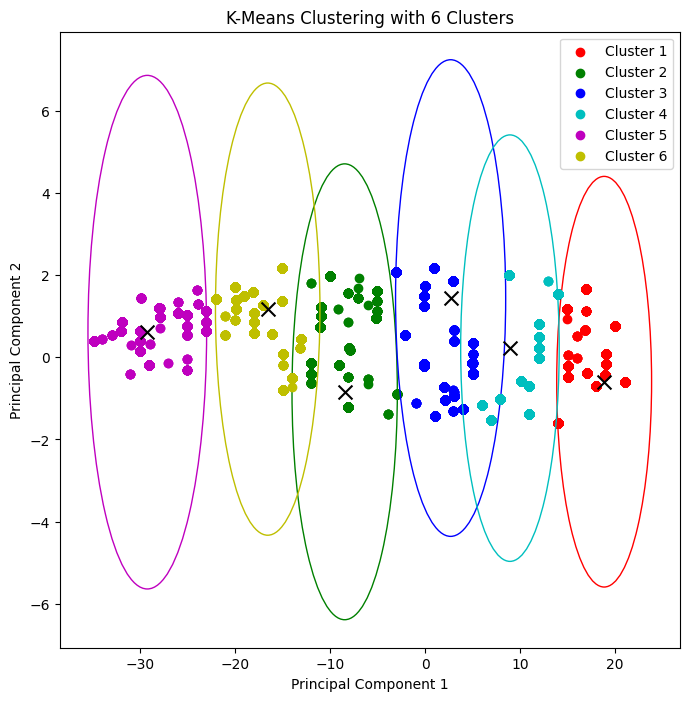

In [ ]:
# Use data from 'dataset' for PCA and KMeans
# Assuming 'target_columns' from the previous section still holds the relevant features
train_data = X

# Handle missing values (NaN) by removing or imputing:
#train_data.dropna(inplace=True)  # Removes rows with NaN
# OR
# train_data.fillna(train_data.mean(), inplace=True)  # Imputes with mean

#create and fit pca model to training data
pca_model=PCA(n_components=2)
pca_model.fit(train_data)

train_data_2d=pca_model.transform(train_data)
#create k means
kmeans_model=KMeans(n_clusters=6)
kmeans_model.fit(train_data_2d)
#get cluster labels and centroids
cluster_labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

# Visualize clusters, centroids, and circles
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Colors for clusters

for cluster in range(6):
    # Get data points for the current cluster
    cluster_data = train_data_2d[cluster_labels == cluster]

    # Plot data points for the current cluster
    plt.scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        color=colors[cluster],
        label=f'Cluster {cluster + 1}',
    )

    # Plot centroid for the current cluster
    plt.scatter(
        centroids[cluster, 0],
        centroids[cluster, 1],
        marker='x',
        s=100,
        color='black',
    )

    # Calculate distance from centroid to farthest point in the cluster
    distances = np.linalg.norm(cluster_data - centroids[cluster], axis=1)
    radius = np.max(distances)

    # Plot circle around centroid
    circle = plt.Circle(
        centroids[cluster], radius, color=colors[cluster], fill=False
    )
    plt.gca().add_patch(circle)

# Properly indent the plotting commands outside the loop
plt.title('K-Means Clustering with 6 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#Output to csv
dataset['cluster'] = cluster_labels


dataset.to_csv('output_vectors.csv', index=False)


K Means Adjusted for Select Values

# Step 4: Neural Network
Neural Network implementation below with graphs to show relationships between attack vector and inputs to find what is the best predictor

In [ ]:
# Select specific columns from the dataset for clustering
selected_columns = [
    "CVSS Attack Vector Origin",
    "CVSS Attack Complexity",
    "CVSS Attack Authentication",
    "Confidentiality",
    "Integrity Impact",
    "Availability Impact"
]

# Extract X as a NumPy array
X = dataset[selected_columns].values
#target value for supervised learning. uses column 6 for CVSS score
#when declaring an axis, first select the column then transform it using the "values" method

#have to impute NaN values
#y = dataset["CVSS"]
dataset["CVSS Base Score"] = dataset["CVSS Base Score"].fillna(dataset["CVSS Base Score"].mean())
y = dataset["CVSS Base Score"].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding all columns in X
for col_index in range(X.shape[1]):  # Iterate through all columns of X
    X[:, col_index] = le.fit_transform(X[:, col_index])

le.fit_transform(y)
print(X)
print(y)

[[2 1 1 0 0 0]
 [0 2 0 1 0 2]
 [0 2 0 1 0 2]
 ...
 [2 1 1 2 2 2]
 [2 1 1 2 2 2]
 [2 2 1 0 0 0]]
[10.   5.4  5.4 ...  7.5  7.5  9.3]


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7495/7495 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.8969 - mae: 0.2781
Epoch 2/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0015 - mae: 0.0223
Epoch 3/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0011 - mae: 0.0197
Epoch 4/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 8.0407e-04 - mae: 0.0169
Epoch 5/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 9.8294e-04 - mae: 0.0154
Epoch 6/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 5.8813e-04 - mae: 0.0149
Epoch 7/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 5.3356e-04 - mae: 0.0146
Epoch 8/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 6.0459e-04 - mae: 0.0145
Epoch 9/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 4.1677e-04 - mae: 0.0118
Epoch 10/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 4.0966e-04 - mae: 0.0116
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.6052e-05 - mae: 0.0057
Mean Squared Error: 6.813219079049304e-05
Mean Absolute Error: 0.0

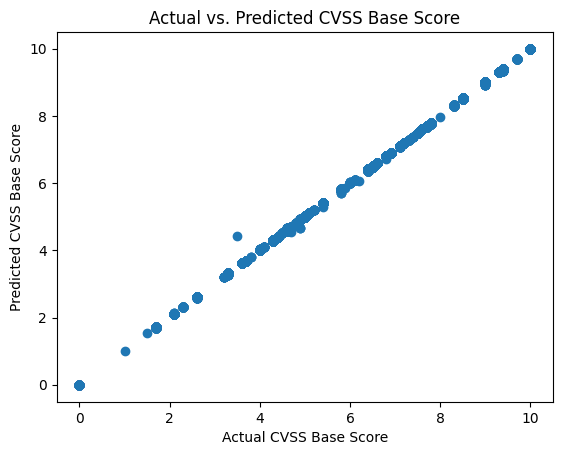

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data if necessary (e.g., using StandardScaler)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build a neural network model using TensorFlow/Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (CVSS Base score)
])

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print('Mean Squared Error:', loss)
print('Mean Absolute Error:', mae)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Analyze the results (e.g., plot predicted vs. actual values)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CVSS Base Score')
plt.ylabel('Predicted CVSS Base Score')
plt.title('Actual vs. Predicted CVSS Base Score')
plt.show()



Experimental Data below

Playing around with different X and Y values

In [ ]:
# Select specific columns from the dataset for clustering
selected_columns = [
    "CVSS Attack Vector Origin",
    "CVSS Attack Complexity",
    "CVSS Attack Authentication",
    "Confidentiality",
    "Integrity Impact",
    "Availability Impact"
]
yvalue="OS"
# Extract X as a NumPy array
X = dataset[selected_columns].values
#target value for supervised learning. uses column 6 for CVSS score
#when declaring an axis, first select the column then transform it using the "values" method

#have to impute NaN values
#y = dataset["CVSS"]
y=dataset[yvalue].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encoding all columns in X
for col_index in range(X.shape[1]):  # Iterate through all columns of X
    X[:, col_index] = le.fit_transform(X[:, col_index])

y=le.fit_transform(y)
print(X)
print(y)

[[2 1 1 0 0 0]
 [0 2 0 1 0 2]
 [0 2 0 1 0 2]
 ...
 [2 1 1 2 2 2]
 [2 1 1 2 2 2]
 [2 2 1 0 0 0]]
[6 6 6 ... 6 6 6]


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7495/7495 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 3.3873 - mae: 0.8866
Epoch 2/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 2.6266 - mae: 0.7178
Epoch 3/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 2.6252 - mae: 0.7198
Epoch 4/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 2.5809 - mae: 0.7026
Epoch 5/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 2.5777 - mae: 0.6981
Epoch 6/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 2.6029 - mae: 0.7062
Epoch 7/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.6109 - mae: 0.7005
Epoch 8/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 2.6058 - mae: 0.7036
Epoch 9/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 2.5664 - mae: 0.6896
Epoch 10/10
7495/7495 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 2.6158 - mae: 0.6997
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.5898 - mae: 0.6729
Mean Squared Error: 2.62672758102417
Mean Absolute Error: 0.6786934733390808
1874/1874 ━━━━━━━━━━━

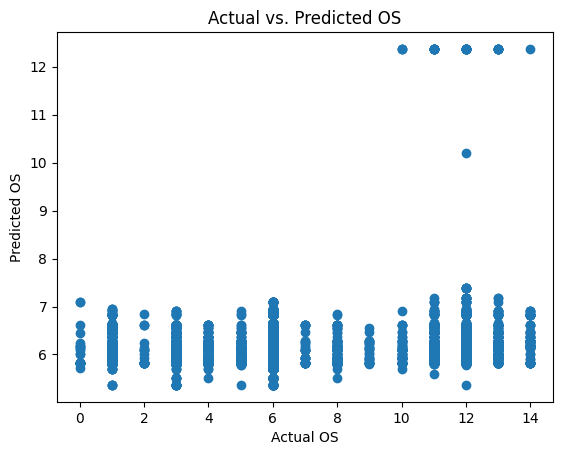

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data if necessary (e.g., using StandardScaler)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build a neural network model using TensorFlow/Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (CVSS Base score)
])

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print('Mean Squared Error:', loss)
print('Mean Absolute Error:', mae)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Analyze the results (e.g., plot predicted vs. actual values)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel(f'Actual {yvalue}')
plt.ylabel(f'Predicted {yvalue}')
plt.title(f'Actual vs. Predicted {yvalue}')
plt.show()

